<a href="https://colab.research.google.com/github/eith010/ANN_HW1/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/ANNDL1/
!ls

/gdrive/My Drive/ANNDL1
data_augmentation_experiments  Finaltry  model.png  Untitled0.ipynb
dataset.zip		       leaves	 training


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
# Random seed for reproducibility
seed = 30

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
labels = [
    'Apple', 
    'Blueberry', 
    'Cherry', 
    'Corn', 
    'Grape', 
    'Orange', 
    'Peach', 
    'Pepper', 
    'Potato', 
    'Raspberry',
    'Soybean', 
    'Squash', 
    'Strawberry', 
    'Tomato', 
]

In [ ]:
dataset_dir = 'Finaltry/training'

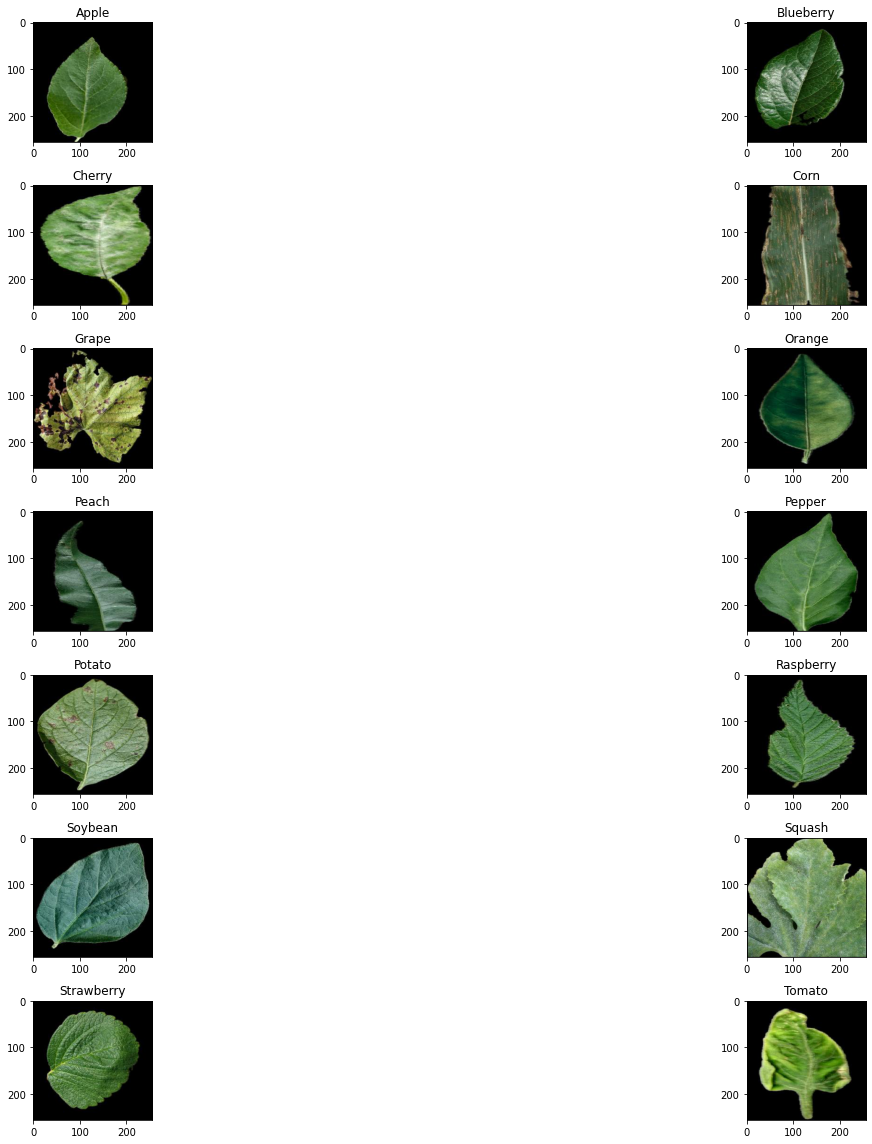

In [ ]:
num_row = 7
num_col = 2
fig,axes=plt.subplots(num_row,num_col,figsize=(4*num_row,8*num_col))
for i in range(num_row*num_col):
  if i < 14:
    class_imgs = next(os.walk('Finaltry/training/{}/'.format(labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('Finaltry/training/{}/{}'.format(labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Dataset folders 
!ls
# Inspect dataset structure on disk
print("Depth 0 (dataset)")
print("-------")
!ls Finaltry
print()
print("Depth 1 (e.g., training/straw)")
print("------------------------")
!ls Finaltry/training
print()
print("Depth 2 (e.g., FInaltry/training/Apple)")
print("------------------------")
!ls Finaltry/training/Apple
print()

data_augmentation_experiments  Finaltry  model.png  Untitled0.ipynb
dataset.zip		       leaves	 training
Depth 0 (dataset)
-------
training

Depth 1 (e.g., training/straw)
------------------------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 2 (e.g., FInaltry/training/Apple)
------------------------
00001.jpg  00182.jpg  00355.jpg  00537.jpg  22499.jpg  22682.jpg  22855.jpg
00003.jpg  00183.jpg  00357.jpg  00538.jpg  22501.jpg  22683.jpg  22856.jpg
00004.jpg  00184.jpg  00358.jpg  00539.jpg  22502.jpg  22684.jpg  22857.jpg
00005.jpg  00185.jpg  00359.jpg  00540.jpg  22504.jpg  22685.jpg  22858.jpg
00006.jpg  00186.jpg  00360.jpg  00543.jpg  22505.jpg  22686.jpg  22859.jpg
00007.jpg  00187.jpg  00361.jpg  00544.jpg  22506.jpg  22687.jpg  22860.jpg
00008.jpg  00188.jpg  00362.jpg  00545.jpg  22507.jpg  22688.jpg  22861.jpg
00009.jpg  00189.jpg  00363.jpg  00546.jpg  22509.jpg  22690.jpg  22862.jpg
000

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(validation_split=0.2)    
new_generator = ImageDataGenerator(validation_split=0.2) 
train_gen = image_generator.flow_from_directory(
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="training"
                                                 )

validation_gen = image_generator.flow_from_directory( 
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=False,
                                                 seed=seed,
                                                 subset="validation"
                                                 )

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Apple': 0, 'Blueberry': 1, 'Cherry': 2, 'Corn': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}

Target classes
[ 0  0  0 ... 13 13 13]


In [ ]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label: 6
Class name: Peach


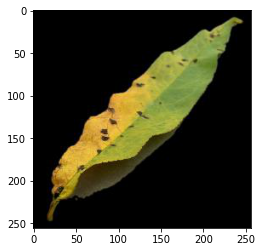

In [ ]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

In [ ]:
input_shape = (256, 256, 3)
epochs = 500

In [ ]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    resize_layer = tfkl.Resizing(64, 64, interpolation="bicubic")(input_layer)

    conv1 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv1')(resize_layer)
    pool1 = tfkl.MaxPooling2D(name = 'Pool1')(conv1)

    conv2 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv2')(pool1)
    pool2 = tfkl.MaxPooling2D(name = 'Pool2')(conv2)

    conv3 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv3')(pool2)
    glob_pooling = tfkl.GlobalAveragePooling2D(name='GloablPooling')(conv3)
    glob_pooling = tfkl.Dropout(0.3, seed=seed, name='GloablPoolingDropout')(glob_pooling)

    classifier_layer = tfkl.Dense(
        units=256,  
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Classifier')(glob_pooling)
    classifier_layer = tfkl.Dropout(0.3, seed=seed, name='ClassifierDropout')(classifier_layer)

    output_layer = tfkl.Dense(
        units=14, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output')(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
# model2 = build_model(input_shape)
# model2.summary()
# tfk.utils.plot_model(model2)

Rotation: {'theta': 8.6486121641001, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Shift: {'theta': 0, 'tx': 0, 'ty': 37, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Zoom: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1.0864861216410011, 'zy': 0.9284490937810699, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Flip: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 



Text(0.5, 1.0, 'Flipped')

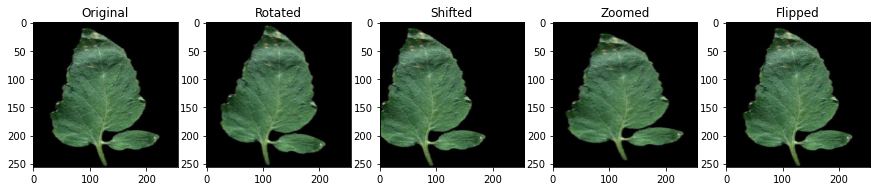

In [ ]:
# Create some augmentation examples

# Get sample image
image = next(train_gen)[0][4]

# Create an instance of ImageDataGenerator for each transformation
rot_gen = ImageDataGenerator(rotation_range=30)
shift_gen = ImageDataGenerator(width_shift_range=50)
zoom_gen = ImageDataGenerator(zoom_range=0.3)
flip_gen = ImageDataGenerator(horizontal_flip=True)

# Get random transformations
rot_t = rot_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Rotation:', rot_t, '\n')
shift_t = shift_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Shift:', shift_t, '\n')
zoom_t = zoom_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Zoom:', zoom_t, '\n')
flip_t = flip_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Flip:', flip_t, '\n')

# Apply the transformation
gen = ImageDataGenerator(fill_mode='constant', cval=0.)
rotated = gen.apply_transform(image, rot_t)
shifted = gen.apply_transform(image, shift_t) 
zoomed = gen.apply_transform(image, zoom_t) 
flipped = gen.apply_transform(image, flip_t)  

# Plot original and augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 45))
ax[0].imshow(np.uint8(image))
ax[0].set_title('Original')
ax[1].imshow(np.uint8(rotated))
ax[1].set_title('Rotated')
ax[2].imshow(np.uint8(shifted))
ax[2].set_title('Shifted')
ax[3].imshow(np.uint8(zoomed))
ax[3].set_title('Zoomed')
ax[4].imshow(np.uint8(flipped))
ax[4].set_title('Flipped')

Transform: {'theta': 8.6486121641001, 'tx': 45, 'ty': 12, 'shear': 0, 'zx': 1.085837112199997, 'zy': 1.1238486379980825, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None}


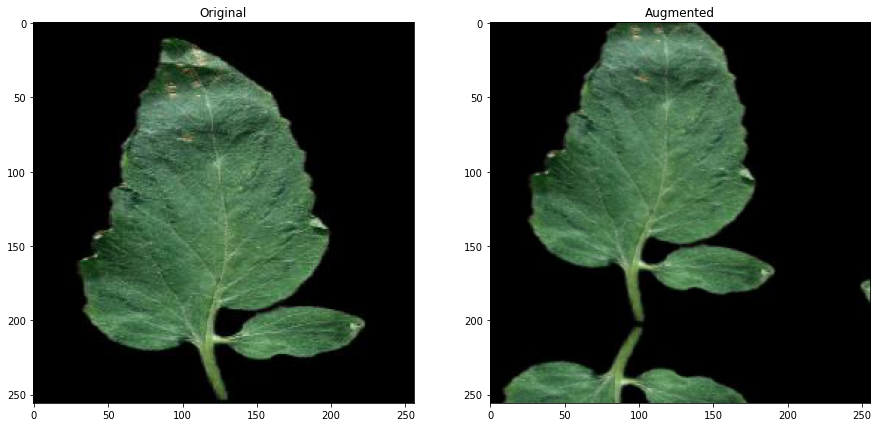

In [ ]:
# Combine multiple transformations
gen = ImageDataGenerator(rotation_range=30,
                         height_shift_range=50,
                         width_shift_range=50,
                         zoom_range=0.3,
                         horizontal_flip=True,
                         vertical_flip=True, 
                         fill_mode='reflect')

# Get random transformation
t = gen.get_random_transform(img_shape=(256, 256), seed=seed)
print("Transform:", t)

# Apply the transformation
augmented = gen.apply_transform(image, t)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(np.uint8(image))
ax[0].set_title("Original")
ax[1].imshow(np.uint8(augmented))
ax[1].set_title("Augmented")
plt.show()

In [ ]:
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(rotation_range=30,
                                        height_shift_range=50,
                                        width_shift_range=50,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image


# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=dataset_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)


Found 17728 images belonging to 14 classes.


In [ ]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('data_augmentation_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 resizing (Resizing)         (None, 64, 64, 3)         0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        1792      
                                                                 
 Pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 128)       73856     
                                                                 
 Pool2 (MaxPooling2D)        (None, 16, 16, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 256)       295168

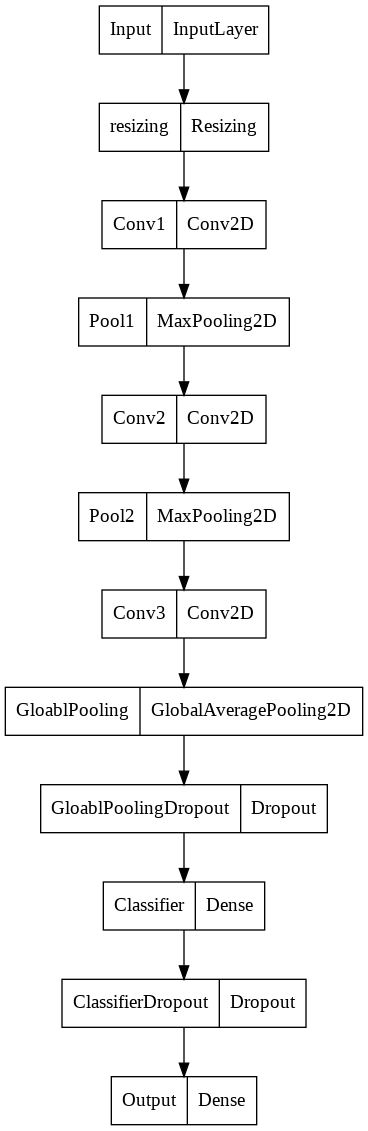

In [ ]:
model4 = build_model(input_shape)
model4.summary()
tfk.utils.plot_model(model4)

In [ ]:
tf.get_logger().setLevel('WARNING') #  if you want to suppress only INFOs
tf.get_logger().setLevel('ERROR') #  if you want to suppress both WARNINGs and INFOs

# Create folders and callbacks and fit
aug_callbacks = create_folders_and_callbacks(model_name='CNN_Aug')

# Train the model
history = model4.fit(
    x = aug_train_gen,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = aug_callbacks,
).history

Epoch 1/500
2216/2216 [==============================] - ETA: 0s - loss: 1.8653 - accuracy: 0.4245

2216/2216 [==============================] - 2582s 1s/step - loss: 1.8653 - accuracy: 0.4245 - val_loss: 338.1156 - val_accuracy: 0.3897
Epoch 2/500
2216/2216 [==============================] - ETA: 0s - loss: 1.2877 - accuracy: 0.5824

2216/2216 [==============================] - 312s 141ms/step - loss: 1.2877 - accuracy: 0.5824 - val_loss: 320.7013 - val_accuracy: 0.4250
Epoch 3/500
2216/2216 [==============================] - ETA: 0s - loss: 0.9758 - accuracy: 0.6857

2216/2216 [==============================] - 312s 141ms/step - loss: 0.9758 - accuracy: 0.6857 - val_loss: 471.6487 - val_accuracy: 0.4131
Epoch 4/500
2216/2216 [==============================] - ETA: 0s - loss: 0.7918 - accuracy: 0.7393

2216/2216 [==============================] - 312s 141ms/step - loss: 0.7918 - accuracy: 0.7393 - val_loss: 421.4270 - val_accuracy: 0.4391
Epoch 5/500
2216/2216 [==============================] - ETA: 0s - loss: 0.6587 - accuracy: 0.7884

2216/2216 [==============================] - 312s 141ms/step - loss: 0.6587 - accuracy: 0.7884 - val_loss: 362.4013 - val_accuracy: 0.4815
Epoch 6/500
2216/2216 [==============================] - ETA: 0s - loss: 0.5670 - accuracy: 0.8182

2216/2216 [==============================] - 315s 142ms/step - loss: 0.5670 - accuracy: 0.8182 - val_loss: 378.9431 - val_accuracy: 0.4586
Epoch 7/500
2216/2216 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.8378

2216/2216 [==============================] - 316s 142ms/step - loss: 0.5063 - accuracy: 0.8378 - val_loss: 636.0980 - val_accuracy: 0.4332
Epoch 8/500
2216/2216 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.8502

2216/2216 [==============================] - 316s 142ms/step - loss: 0.4657 - accuracy: 0.8502 - val_loss: 423.8005 - val_accuracy: 0.5213
Epoch 9/500
2216/2216 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8655

2216/2216 [==============================] - 314s 142ms/step - loss: 0.4207 - accuracy: 0.8655 - val_loss: 333.4558 - val_accuracy: 0.5202
Epoch 10/500
2216/2216 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8747

2216/2216 [==============================] - 308s 139ms/step - loss: 0.3807 - accuracy: 0.8747 - val_loss: 378.1224 - val_accuracy: 0.5355
Epoch 11/500
2216/2216 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.8840

2216/2216 [==============================] - 302s 136ms/step - loss: 0.3666 - accuracy: 0.8840 - val_loss: 391.2097 - val_accuracy: 0.5290
Epoch 12/500
2216/2216 [==============================] - ETA: 0s - loss: 0.3482 - accuracy: 0.8901

2216/2216 [==============================] - 306s 138ms/step - loss: 0.3482 - accuracy: 0.8901 - val_loss: 446.1866 - val_accuracy: 0.5027


In [ ]:
model4.save("data_augmentation_experiments/CNN_Aug_Best")

In [25]:
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))

In [41]:
train2_generator = combine_generator(train_gen, aug_train_gen)